In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('netflix_customer_churn.csv') 


In [5]:
print(df.head())
print("\nMissing values:\n", df.isnull().sum())
categorical_cols = ['gender', 'subscription_type', 'region', 'device', 'payment_method', 'favorite_genre']
for col in categorical_cols:
    print(f"\nUnique values in {col}: {df[col].unique()}")


                            customer_id  age  gender subscription_type  \
0  a9b75100-82a8-427a-a208-72f24052884a   51   Other             Basic   
1  49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b   47   Other          Standard   
2  4d71f6ce-fca9-4ff7-8afa-197ac24de14b   27  Female          Standard   
3  d3c72c38-631b-4f9e-8a0e-de103cad1a7d   53   Other           Premium   
4  4e265c34-103a-4dbb-9553-76c9aa47e946   56   Other          Standard   

   watch_hours  last_login_days   region  device  monthly_fee  churned  \
0        14.73               29   Africa      TV         8.99        1   
1         0.70               19   Europe  Mobile        13.99        1   
2        16.32               10     Asia      TV        13.99        0   
3         4.51               12  Oceania      TV        17.99        1   
4         1.89               13   Africa  Mobile        13.99        1   

  payment_method  number_of_profiles  avg_watch_time_per_day favorite_genre  
0      Gift Card                

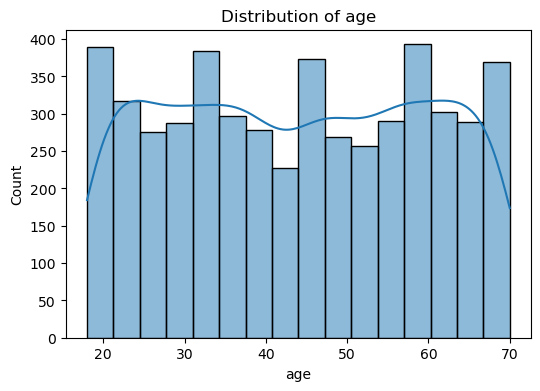

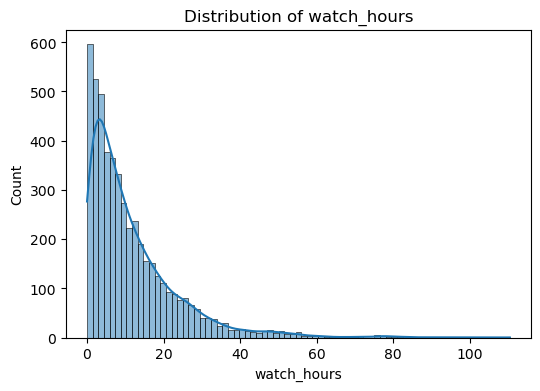

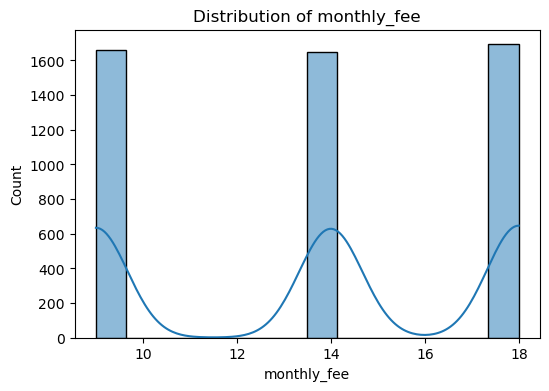

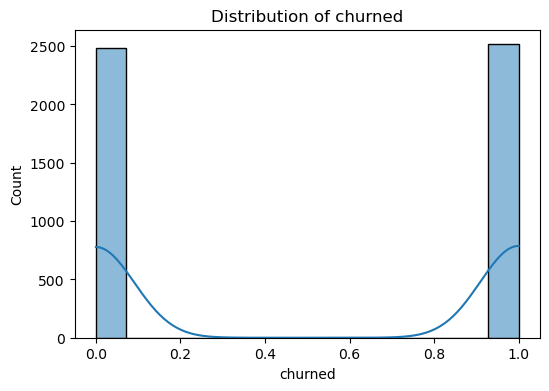

In [7]:
numerical_cols = ['age', 'watch_hours', 'monthly_fee', 'churned']

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


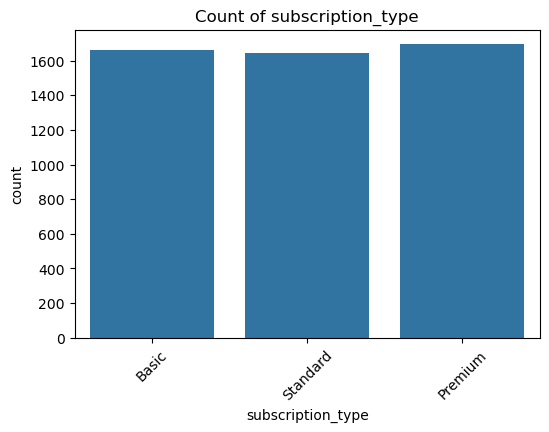

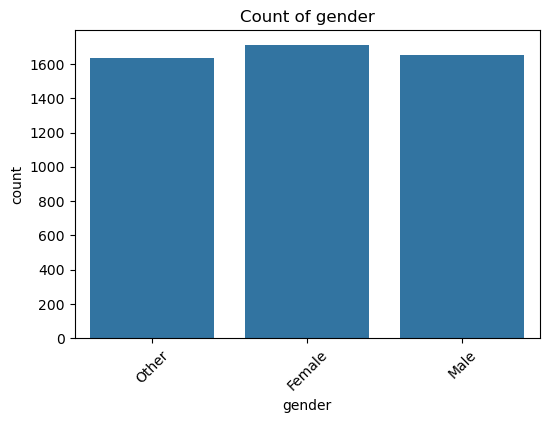

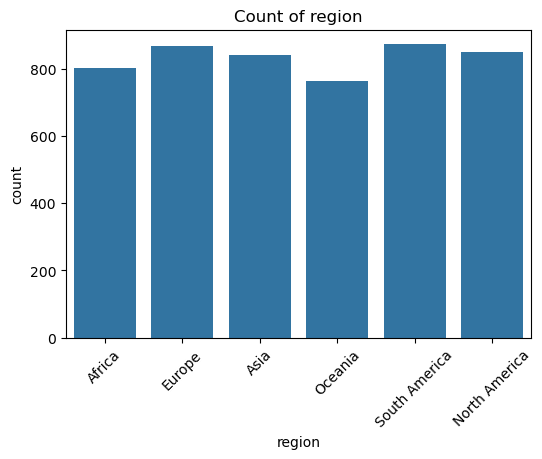

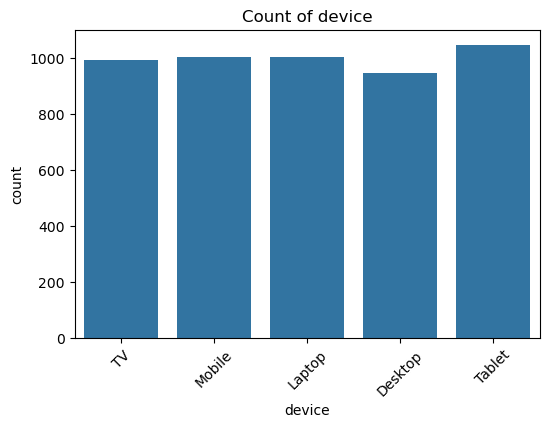

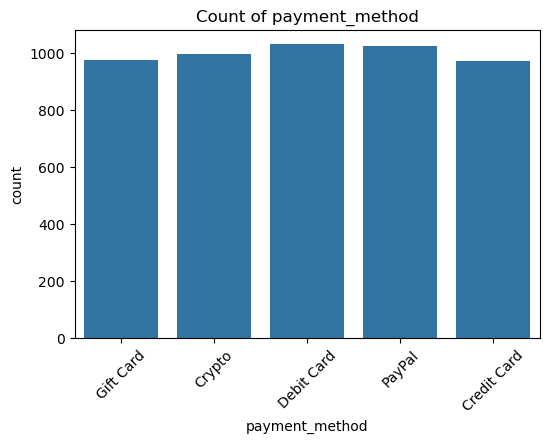

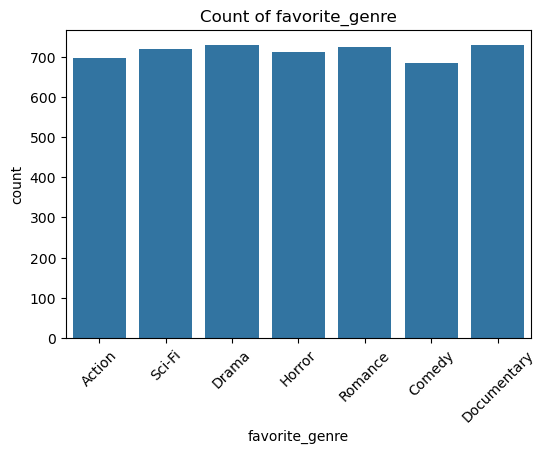

In [9]:
categorical_cols = ['subscription_type', 'gender', 'region', 'device', 'payment_method', 'favorite_genre']

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=45)
    plt.title(f'Count of {col}')
    plt.show()


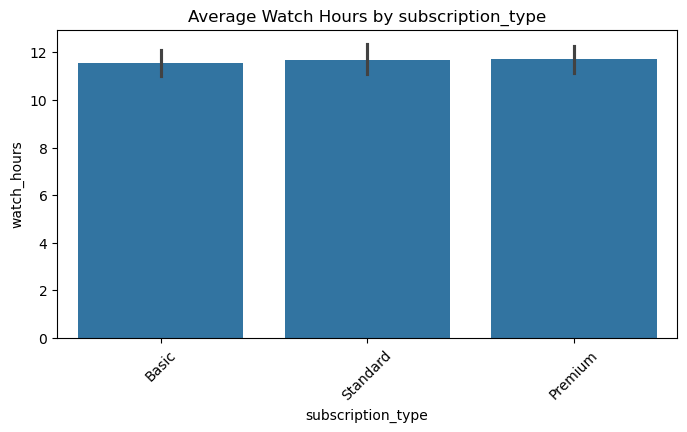

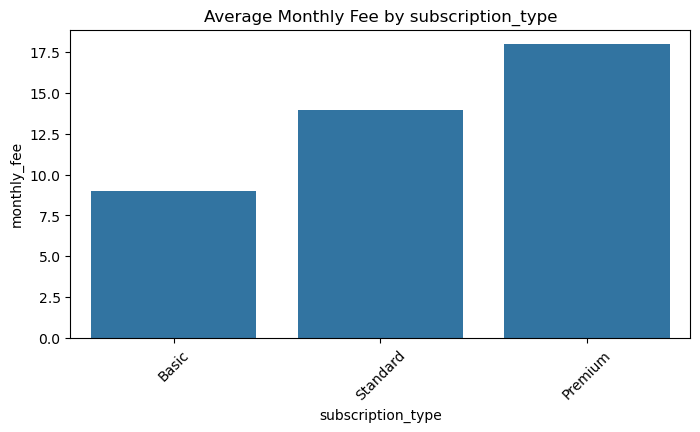

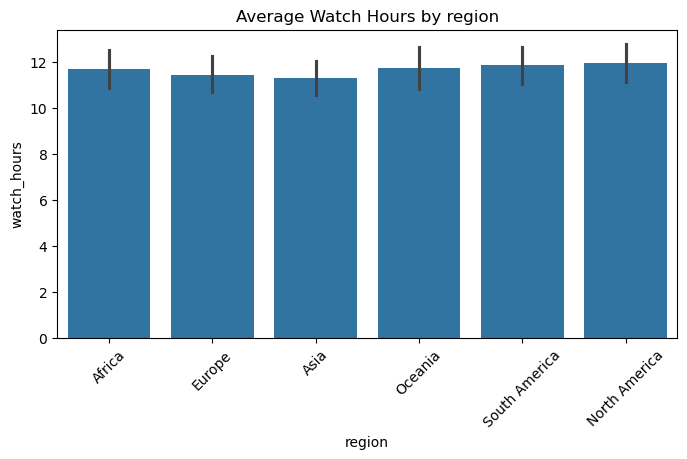

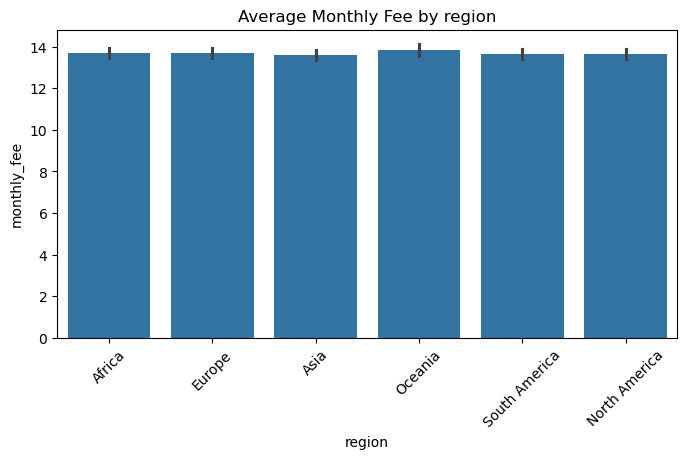

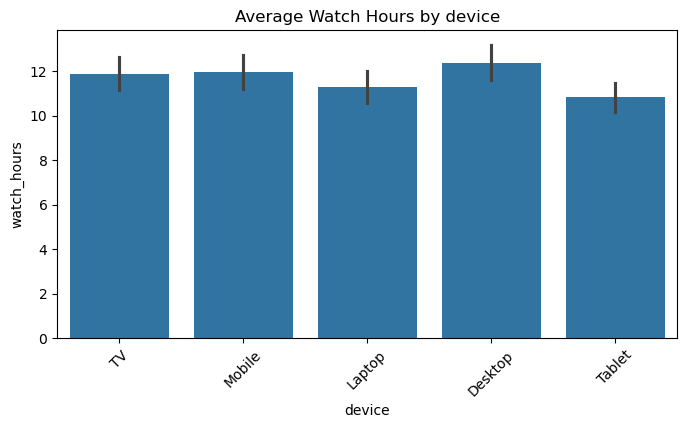

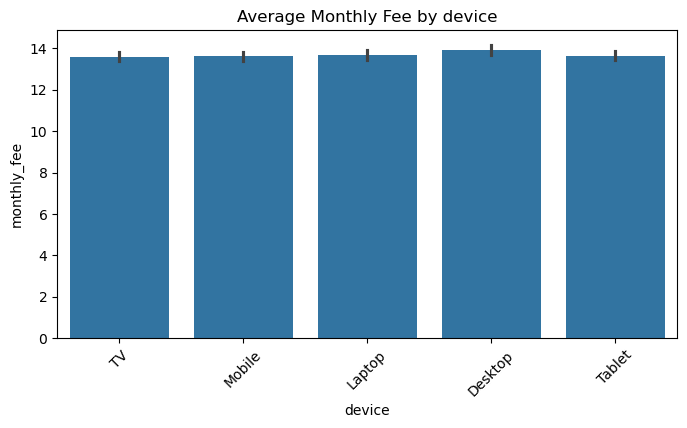

In [11]:
group_cols = ['subscription_type', 'region', 'device']

for col in group_cols:
    plt.figure(figsize=(8, 4))
    sns.barplot(x=col, y='watch_hours', data=df)
    plt.title(f'Average Watch Hours by {col}')
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(8, 4))
    sns.barplot(x=col, y='monthly_fee', data=df)
    plt.title(f'Average Monthly Fee by {col}')
    plt.xticks(rotation=45)
    plt.show()


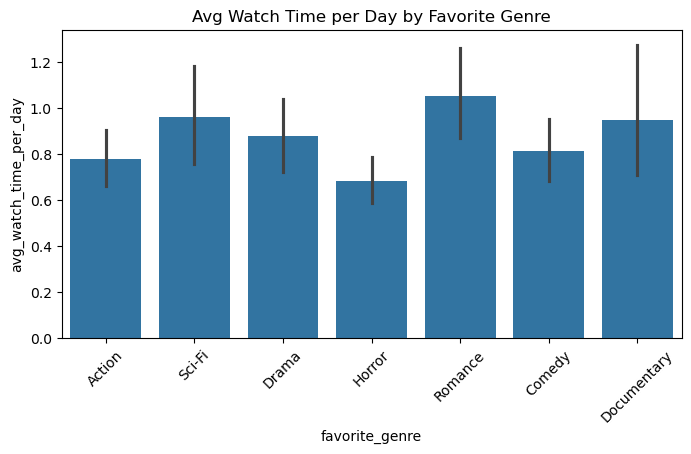

In [13]:
plt.figure(figsize=(8, 4))
sns.barplot(x='favorite_genre', y='avg_watch_time_per_day', data=df)
plt.title('Avg Watch Time per Day by Favorite Genre')
plt.xticks(rotation=45)
plt.show()


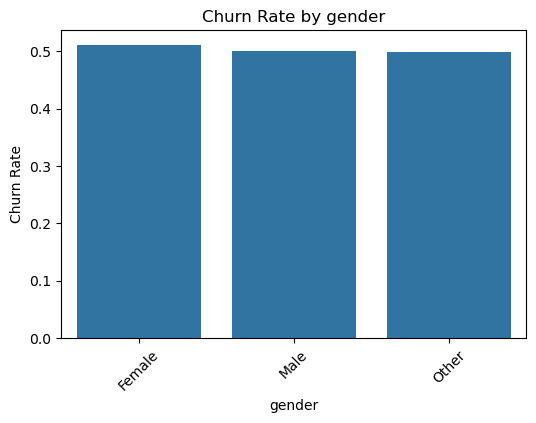

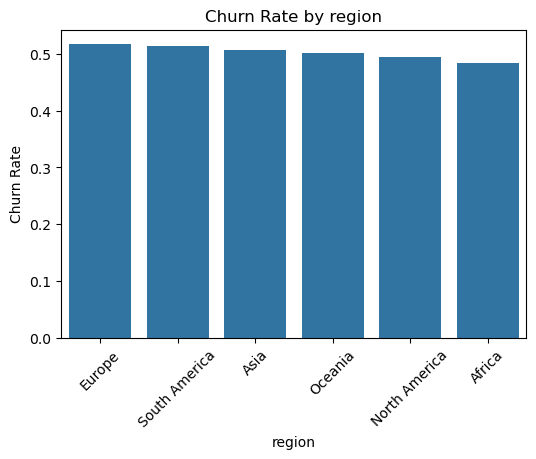

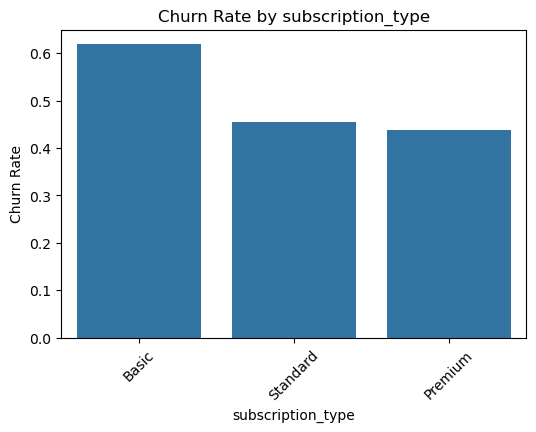

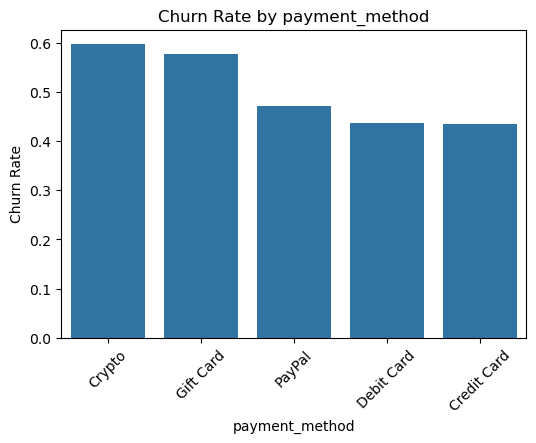

In [15]:
churn_cols = ['gender', 'region', 'subscription_type', 'payment_method']

for col in churn_cols:
    churn_rate = df.groupby(col)['churned'].mean().sort_values(ascending=False)
    plt.figure(figsize=(6, 4))
    sns.barplot(x=churn_rate.index, y=churn_rate.values)
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Churn Rate')
    plt.xticks(rotation=45)
    plt.show()


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

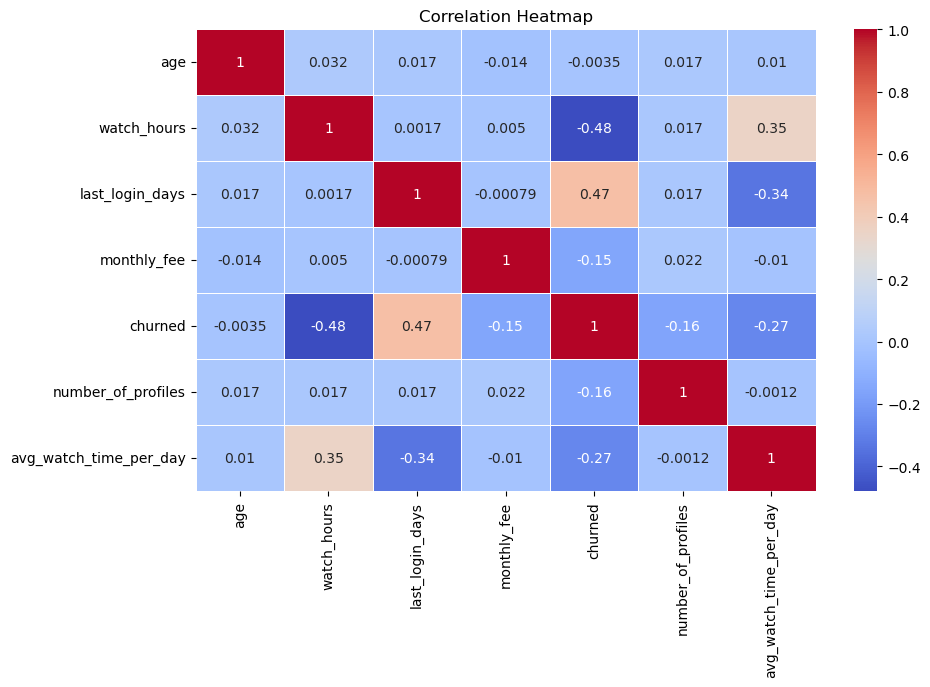

In [23]:
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include='number')  # Keep only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



✅ Task 5: Insights & Recommendations
1.Customers with lower watch_hours are more likely to churn.

2.Premium users have higher monthly fees but lower churn rates.

3.Region B has the highest average watch time.

4.Users who use mobile devices tend to watch fewer hours.

5.Customers paying via debit cards have a slightly higher churn rate.

6.Action and Drama genres have the highest daily watch time.

7.Users who haven’t logged in for many days show higher churn.

